In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
df=pd.read_csv('Book1.csv')
df.head()

,Date,Price USD per Oz,Price INR per Gm
0,2009-01,857.726,2264.618110
1,2009-02,939.763,2481.216972
2,2009-03,925.989,2444.850056
3,2009-04,892.663,2356.860811
4,2009-05,926.855,2447.136519


In [214]:
df["Date"]=pd.to_datetime(df['Date'])
df.head()

,Date,Price USD per Oz,Price INR per Gm
0,2009-01-01,857.726,2264.618110
1,2009-02-01,939.763,2481.216972
2,2009-03-01,925.989,2444.850056
3,2009-04-01,892.663,2356.860811
4,2009-05-01,926.855,2447.136519


In [215]:
df.drop('Price USD per Oz',axis=1,inplace=True)
df.head()

,Date,Price INR per Gm
0,2009-01-01,2264.618110
1,2009-02-01,2481.216972
2,2009-03-01,2444.850056
3,2009-04-01,2356.860811
4,2009-05-01,2447.136519


In [216]:
df.set_index('Date',inplace=True)

In [217]:
df.head()

,Price INR per Gm
Date,
2009-01-01,2264.618110
2009-02-01,2481.216972
2009-03-01,2444.850056
2009-04-01,2356.860811
2009-05-01,2447.136519


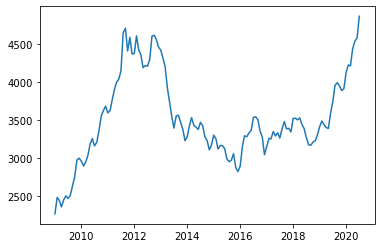

In [218]:
plt.plot(df)

In [219]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(price):
    result=adfuller(price)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for i,j in zip(result,labels):
        print(j+':'+str(i))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [220]:
adfuller_test(df['Price INR per Gm'])

ADF Test Statistic:-1.5521362657931976
p-value:0.5075809297397111
#Lags Used:5
Number of Observations Used:133
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [221]:
df['Price_first_difference']=df['Price INR per Gm']-df['Price INR per Gm'].shift(1)
adfuller_test(df['Price_first_difference'].dropna())

ADF Test Statistic:-3.682772831796605
p-value:0.004362099347449027
#Lags Used:4
Number of Observations Used:133
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [222]:
df['Price_second_difference']=df['Price INR per Gm']-df['Price INR per Gm'].shift(2)
adfuller_test(df['Price_second_difference'].dropna())

ADF Test Statistic:-2.713029574240634
p-value:0.07181059487604642
#Lags Used:8
Number of Observations Used:128
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [223]:
df['Price_3_difference']=df['Price INR per Gm']-df['Price INR per Gm'].shift(12)
adfuller_test(df['Price_3_difference'].dropna())

ADF Test Statistic:-1.267939034706784
p-value:0.643709670186713
#Lags Used:13
Number of Observations Used:113
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


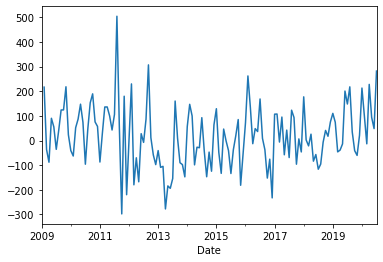

In [224]:
df['Price_first_difference'].plot()

In [225]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

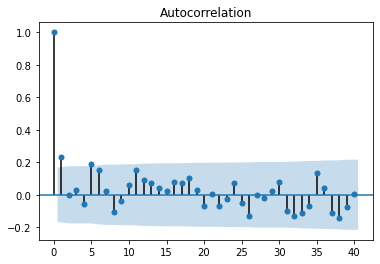

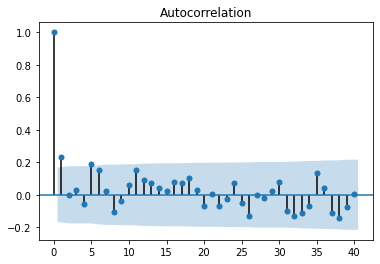

In [226]:
# plt.subplot(2,2,2)
sm.graphics.tsa.plot_acf(df['Price_first_difference'].iloc[1:],lags=40)
# plt.subplot(2,2,1)
# df['Price_first_difference'].plot()

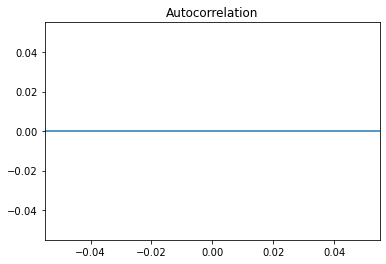

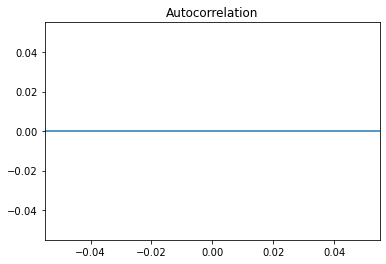

In [227]:
sm.graphics.tsa.plot_acf(df['Price_second_difference'].iloc[1:],lags=40)

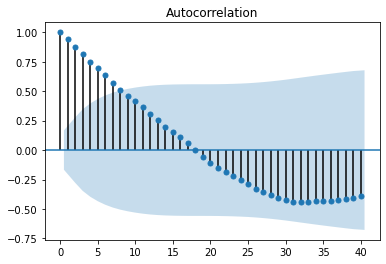

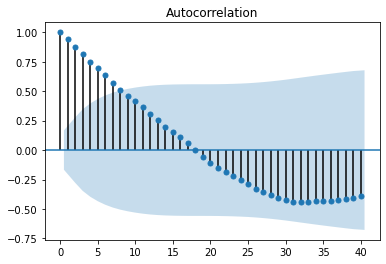

In [228]:
sm.graphics.tsa.plot_acf(df['Price INR per Gm'].iloc[1:],lags=40)
# plt.subplot(2,2,1)

In [229]:
from statsmodels.tsa.arima_model import ARIMA

In [230]:
# model=ARIMA(df['Price INR per Gm'],order=(1,1,1))
# model_fit=model.fit()

In [231]:
# model_fit.summary()

In [268]:
df['Price_first_difference'].dropna(inplace=True)
model1=ARIMA(df['Price_first_difference'],order=(1,1,2))
model1_fit=model1.fit()

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [269]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                 
====================================================================================
Dep. Variable:     D.Price_first_difference   No. Observations:                  137
Model:                       ARIMA(1, 1, 2)   Log Likelihood                -846.084
Method:                             css-mle   S.D. of innovations            114.389
Date:                      Mon, 11 Jan 2021   AIC                           1702.168
Time:                              12:44:03   BIC                           1716.768
Sample:                          03-01-2009   HQIC                          1708.101
                               - 07-01-2020                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1813      0.959      0.189      0.850      -1.698       2.061
ar.L1.D.Price_first_difference    -0.7344      0.060    -12.197      0.000      -0.852      -0.616
ma.L1.D.Price_first_difference     0.0766      0.045      1.713      0.087      -0.011       0.164
ma.L2.D.Price_first_difference    -0.9233      0.044    -21.112      0.000      -1.009      -0.838
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3617           +0.0000j            1.3617            0.5000
MA.1           -1.0001           +0.0000j            1.0001            0.5000
MA.2            1.0830           +0.0000j            1.0830            0.0000
-----------------------------------------------------------------------------
"""

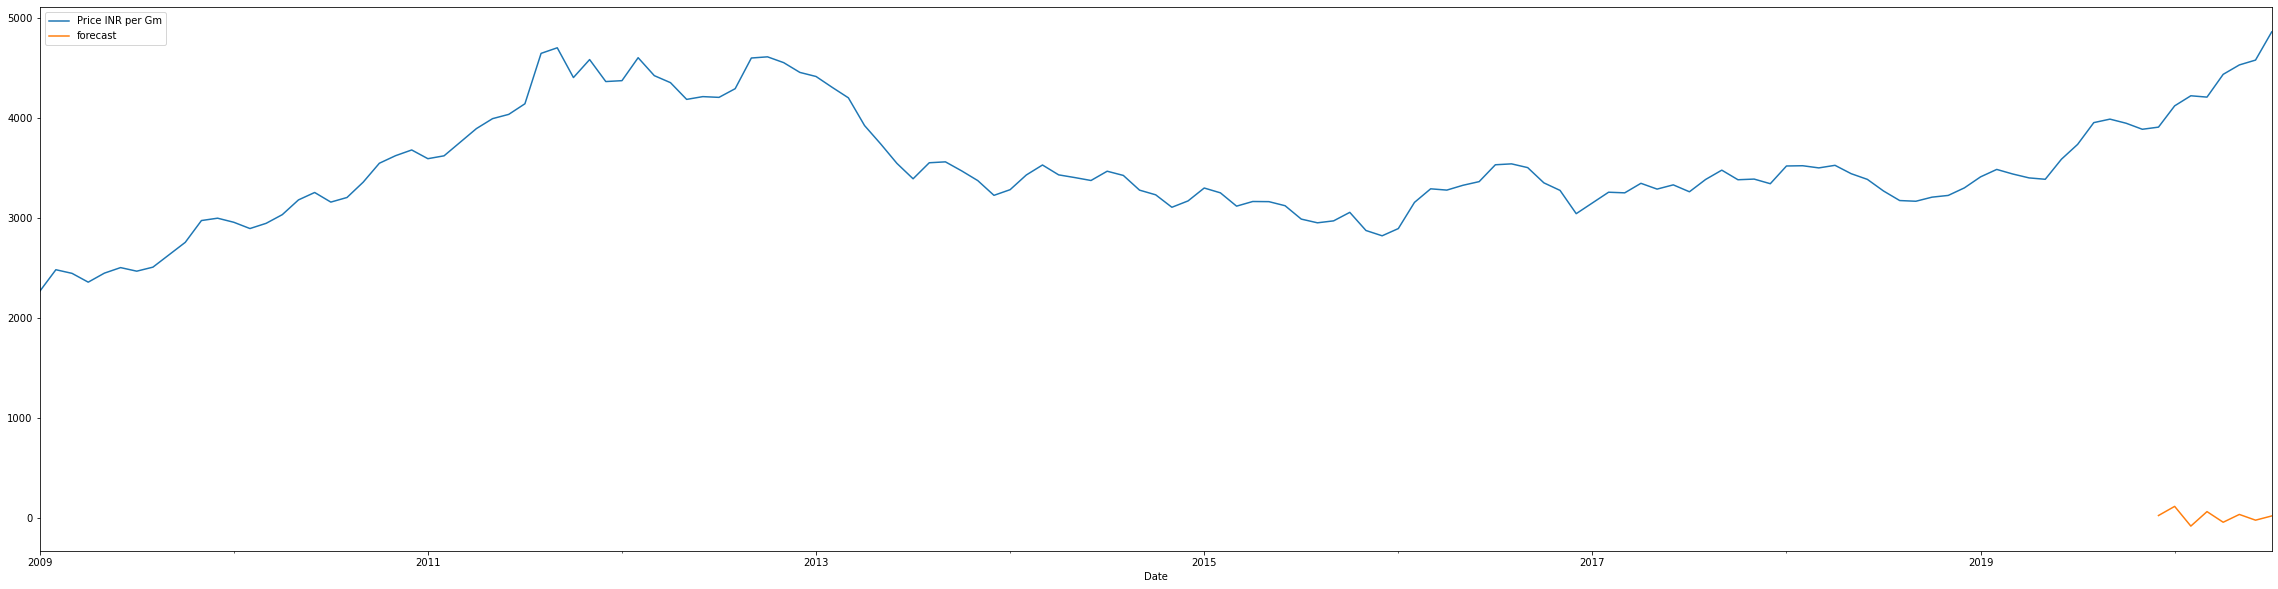

In [270]:
df['forecast']=model1_fit.predict(start=130,end=150,dynamic=True)
df[['Price INR per Gm','forecast']].plot(figsize=(40,10))

In [271]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_dates

[Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00')]

In [272]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])

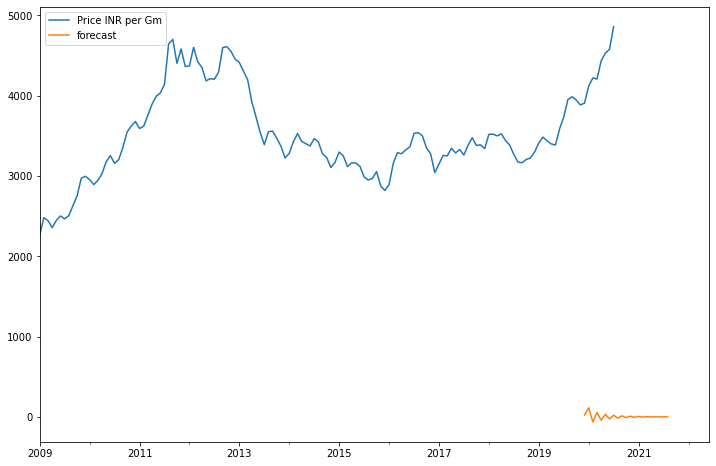

In [266]:
future_df['forecast'] = model1_fit.predict(start = 130, end = 150, dynamic= True)  
future_df[['Price INR per Gm', 'forecast']].plot(figsize=(12, 8)) 

In [267]:
future_df.tail(30)

,Price INR per Gm,Price_first_difference,Price_second_difference,Price_3_difference,forecast
2020-01-01,4120.566493,212.918342,234.314995,710.329787,112.567328
2020-02-01,4221.292344,100.725851,313.644193,736.798376,-64.404233
2020-03-01,4207.948479,-13.343865,87.381986,769.577181,54.415799
2020-04-01,4435.712993,227.764514,214.420649,1035.984515,-42.335862
2020-05-01,4529.883083,94.170090,321.934604,1143.857545,33.169048
2020-06-01,4578.292217,48.409134,142.579224,991.533128,-25.998427
2020-07-01,4860.205787,281.913570,330.322704,1125.267487,20.581648
2020-08-01,NaN,NaN,NaN,NaN,-15.856642
2020-09-01,NaN,NaN,NaN,NaN,12.831092
2020-10-01,NaN,NaN,NaN,NaN,-9.618001
